In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('./data/advanced_features/train.csv', index_col=0)
test = pd.read_csv('./data/advanced_features/test.csv', index_col=0)

In [4]:
train_X = train.drop('target', axis=1)
train_Y = train[['target']]
test_X = test.drop('target', axis=1)
test_Y = test[['target']]

In [5]:
kernels = ['linear', 'rbf', 'poly']
gammas = [0.1, 1, 10, 100]
cs = [0.1, 1, 10, 100, 1000]


In [8]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')

In [9]:
svm.fit(train_X, train_Y) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
train_error = (svm.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y)
test_error = (svm.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y)

In [11]:
[train_error, test_error]

[target    0.677051
 dtype: float64, target    0.711316
 dtype: float64]

<h1> Hyper Parameters Tuning </h1>

In [13]:
train_errors = []
test_errors = []
cnt = 0
for gamma in gammas:
    dt = SVC(kernel='rbf', gamma=gamma)
    dt.fit(train_X, train_Y)
    train_error = ((dt.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y)) ['target']
    test_error = ((dt.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y)) ['target']
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('\r {}%'.format(int((cnt / len(gammas)) * 100)), end='')
    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 25%

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 50%

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 75%

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 100%

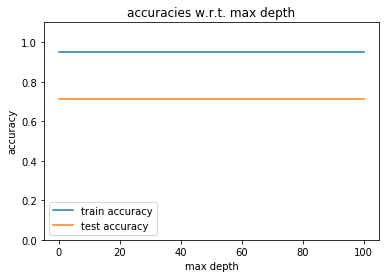

In [15]:
plt.title('accuracies w.r.t. max depth')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.plot(gammas, train_errors, label='train accuracy')
plt.plot(gammas, test_errors, label='test accuracy')
plt.ylim(0,1.1)
plt.legend()

In [17]:
min(test_errors), min(train_errors)

(0.7113163972286374, 0.9511288939697057)

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, test_X, test_Y, cv=5)
scores.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

0.7113148627998139